# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.66258871 2.98911391 2.60949574 2.99938099 2.48159774 2.67490756
 2.70330239 2.19385661 2.25875118 2.69632009]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [2]:
# your code here
import matplotlib.pyplot as plt
bottom=10
ceiling=15
count=100
x = uniform.rvs(size=count)
randoms  = bottom + (ceiling-bottom)*x


bottom2=10
ceiling2=60
count2=1000
y = uniform.rvs(size=count2)
randoms2  = bottom2 + (ceiling2-bottom2)*y

(array([ 91., 105., 117., 107.,  73.,  96., 102., 116.,  94.,  99.]),
 array([10.02933038, 15.02429464, 20.01925891, 25.01422317, 30.00918743,
        35.00415169, 39.99911596, 44.99408022, 49.98904448, 54.98400875,
        59.97897301]),
 <a list of 10 Patch objects>)

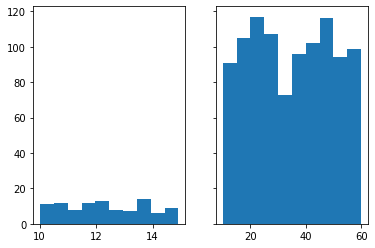

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(x = randoms)
ax2.hist(x = randoms2)

How are the two distributions different?

In [4]:
# your answer here:
"""The first distribution only has 100 numbers. The second has 1000 numbers. 
Although (due to the scale of the plot) it is not possible to see big differences in the distribution, it is 
expected the second distribution to be more uniform than the second, due to the increase of numbers"""

'The first distribution only has 100 numbers. The second has 1000 numbers. \nAlthough (due to the scale of the plot) it is not possible to see big differences in the distribution, it is \nexpected the second distribution to be more uniform than the second, due to the increase of numbers'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

(array([ 1.,  0.,  1.,  2.,  0.,  0.,  2.,  2.,  4.,  9., 15., 11., 14.,
        22., 25., 23., 26., 30., 36., 35., 44., 35., 59., 49., 44., 51.,
        57., 49., 52., 37., 40., 38., 28., 27., 19., 28., 23., 17.,  8.,
         4., 11.,  6.,  8.,  3.,  0.,  2.,  1.,  0.,  1.,  1.]),
 array([-145.62748037, -139.26842061, -132.90936084, -126.55030108,
        -120.19124132, -113.83218155, -107.47312179, -101.11406203,
         -94.75500226,  -88.3959425 ,  -82.03688274,  -75.67782298,
         -69.31876321,  -62.95970345,  -56.60064369,  -50.24158392,
         -43.88252416,  -37.5234644 ,  -31.16440463,  -24.80534487,
         -18.44628511,  -12.08722534,   -5.72816558,    0.63089418,
           6.98995394,   13.34901371,   19.70807347,   26.06713323,
          32.426193  ,   38.78525276,   45.14431252,   51.50337229,
          57.86243205,   64.22149181,   70.58055158,   76.93961134,
          83.2986711 ,   89.65773087,   96.01679063,  102.37585039,
         108.73491015,  115.09396992

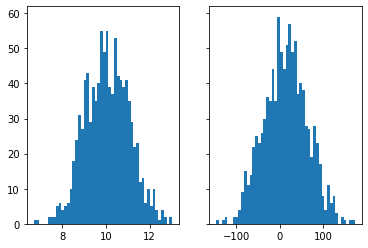

In [5]:
# your code here
#Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
import numpy as np
from scipy.stats import norm
import math

dist1 = np.random.normal(10,1,1000) 
dist2 = np.random.normal(10,50,1000) 

# plotting
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(dist1,50)
ax2.hist(dist2,50)

How are the two distributions different?

In [6]:
# your answer here:
"""When we create a normal distribution, this means that the distribution will be centered in the mean (10)
68% of the data values will be ±1 standard deviations of the mean, 95% of the values will be 
within ±2 standard deviations of the mean and 99.7% of the values will be within ±3 standard deviations
of the mean. Since the STD increases from the first to the second plot, we can see that the histogram
grows in width."""

'When we create a normal distribution, this means that the distribution will be centered in the mean (10)\n68% of the data values will be ±1 standard deviations of the mean, 95% of the values will be \nwithin ±2 standard deviations of the mean and 99.7% of the values will be within ±3 standard deviations\nof the mean. Since the STD increases from the first to the second plot, we can see that the histogram\ngrows in width.'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

(array([8.1000e+01, 3.7400e+02, 6.7650e+03, 1.7039e+04, 8.9660e+03,
        2.0960e+03, 5.6900e+02, 3.6000e+01, 2.1000e+01, 5.0000e+00]),
 array([ 0.06      ,  4.76271429,  9.46542857, 14.16814286, 18.87085714,
        23.57357143, 28.27628571, 32.979     , 37.68171429, 42.38442857,
        47.08714286]),
 <a list of 10 Patch objects>)

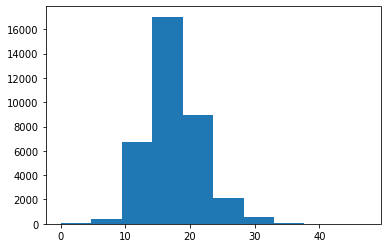

In [7]:
# your code here
import pandas as pd
data1 = pd.read_csv('/home/inrx/Ironhack/Classes/SQL to Python/vehicles/vehicles.csv')
plt.hist(data1['Fuel Barrels/Year'])

2. CO2 Emission Grams/Mile 

(array([3.4000e+01, 8.3200e+02, 1.0205e+04, 1.5411e+04, 6.8250e+03,
        2.0100e+03, 5.7300e+02, 3.6000e+01, 2.1000e+01, 5.0000e+00]),
 array([  37.        ,  160.25714286,  283.51428571,  406.77142857,
         530.02857143,  653.28571429,  776.54285714,  899.8       ,
        1023.05714286, 1146.31428571, 1269.57142857]),
 <a list of 10 Patch objects>)

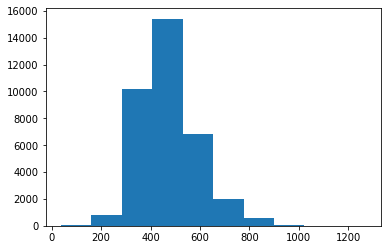

In [8]:
# your code here
plt.hist(data1['CO2 Emission Grams/Mile'])

3. Combined MPG

(array([6.3800e+02, 8.4990e+03, 1.5512e+04, 7.9320e+03, 2.4160e+03,
        6.3600e+02, 2.1000e+02, 6.5000e+01, 3.3000e+01, 1.1000e+01]),
 array([ 7. , 11.9, 16.8, 21.7, 26.6, 31.5, 36.4, 41.3, 46.2, 51.1, 56. ]),
 <a list of 10 Patch objects>)

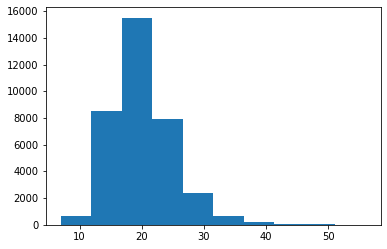

In [9]:
# your code here
plt.hist(data1['Combined MPG'])

Which one(s) of the variables are nearly normally distributed? How do you know?

In [10]:
# you answer here:
"""The one that seams to be closer to the normal distribution is the 'Combined MPG' variable """

"The one that seams to be closer to the normal distribution is the 'Combined MPG' variable "

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

(array([15., 13., 10., 11.,  9.,  9.,  3.,  2.,  3.,  2.,  1.,  5.,  1.,
         2.,  2.,  1.,  0.,  1.,  3.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.50056361e-03, 1.35879963e+00, 2.71609870e+00, 4.07339777e+00,
        5.43069684e+00, 6.78799591e+00, 8.14529498e+00, 9.50259405e+00,
        1.08598931e+01, 1.22171922e+01, 1.35744913e+01, 1.49317903e+01,
        1.62890894e+01, 1.76463885e+01, 1.90036875e+01, 2.03609866e+01,
        2.17182857e+01, 2.30755847e+01, 2.44328838e+01, 2.57901829e+01,
        2.71474820e+01, 2.85047810e+01, 2.98620801e+01, 3.12193792e+01,
        3.25766782e+01, 3.39339773e+01, 3.52912764e+01, 3.66485754e+01,
        3.80058745e+01, 3.93631736e+01, 4.07204727e+01, 4.20777717e+01,
        4.34350708e+01, 4.47923699e+01, 4.61496689e+01, 4.75069680e+01,
        4.88642671e+01, 5.02215661e+01, 5.15788652e+01, 5.29361643e+

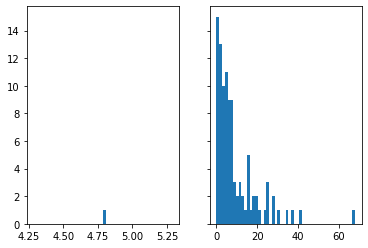

In [11]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

data1 = np.random.exponential(10, size=1)
data2 = np.random.exponential(10, size=100)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(data1,50)
ax2.hist(data2,50)

How are the two distributions different?

In [12]:
# your answer here:
"""I don't think this is correct"""

"I don't think this is correct"

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [19]:
# your answer here
# Hint: This is same as saying P(x<15)

from scipy.stats import expon
expon(10) 
expon.cdf(15)

0.9999996940976795

What is the probability that the customer will spend more than 15 minutes

In [20]:
##### your answer here
print (expon.pdf(15))
print (expon.sf(15))

3.059023205018258e-07
3.059023205018258e-07
